In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#quant de NaN em cada coluna
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#media de sobrevivencia em casa classe
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
#ascending => do menor pro maior

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
train[['Survived', 'SibSp']].groupby(['SibSp']).mean().sort_values('Survived', ascending=False)
#quem tinha menos irmãos/conjudes teve mais chance de sobreviver

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train[['Survived', 'Parch']].groupby(['Parch'], as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
train[['Survived', 'Sex']].groupby(['Sex']).mean().sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
variaveis = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked']
X = train[variaveis]
y = train.Survived
X_predict = test[variaveis]
Xs = [X, X_predict]

In [15]:
for dataset in Xs:
    dataset.loc[ : , 'Sex'] = dataset['Sex'].map(lambda x: 1 if 'female' == x else 0)
X

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,0,22.0,1,0,NaN,S
1,1,1,38.0,1,0,C85,C
2,3,1,26.0,0,0,NaN,S
3,1,1,35.0,1,0,C123,S
4,3,0,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,NaN,S
887,1,1,19.0,0,0,B42,S
888,3,1,NaN,1,2,NaN,S
889,1,0,26.0,0,0,C148,C


In [16]:
print(train.Embarked.value_counts().sum()) #2 NaN
print(test.Embarked.value_counts().sum()) #0 NaN
train.Embarked.value_counts()

889
418


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
for dataset in Xs:
    dataset.loc[ : , 'Embarked'] = dataset['Embarked'].fillna('S').map(lambda x: 1 if x=='S' else (2 if x=='C' else 3))
    # .map( {'S': 0, 'C': 1, 'Q': 2})  => tambem poderia se usar um dict  
X

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,0,22.0,1,0,NaN,1
1,1,1,38.0,1,0,C85,2
2,3,1,26.0,0,0,NaN,1
3,1,1,35.0,1,0,C123,1
4,3,0,35.0,0,0,NaN,1
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,NaN,1
887,1,1,19.0,0,0,B42,1
888,3,1,NaN,1,2,NaN,1
889,1,0,26.0,0,0,C148,2


for dataset in Xs:
    age_mean = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
    dataset.loc[ : ,'Age'].loc[dataset['Age'].isnull()] = age_null_random_list
    #dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list   # <= outro jeito de fazer a ultima linha
    dataset.loc[ : ,'Age'] = dataset.Age.map(int)

    

In [18]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,1.361392
std,0.836071,0.477990,14.526497,1.102743,0.806057,0.635673
min,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,3.000000


In [19]:
X_predict.describe()

,Pclass,Sex,Age,SibSp,Parch,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,1.464115
std,0.841838,0.481622,14.181209,0.896760,0.981429,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,3.000000


In [20]:
for dataset in Xs:
    dataset.loc[ : , 'Cabin'] = dataset['Cabin'].map(lambda x: 0 if type(x)==str else 1)
        
X.tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
881,3,0,33.0,0,0,1,1
882,3,1,22.0,0,0,1,1
883,2,0,28.0,0,0,1,1
884,3,0,25.0,0,0,1,1
885,3,1,39.0,0,5,1,3
886,2,0,27.0,0,0,1,1
887,1,1,19.0,0,0,0,1
888,3,1,NaN,1,2,1,1
889,1,0,26.0,0,0,0,2
890,3,0,32.0,0,0,1,3


In [21]:
X['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
X_predict['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')
#str.extract sep ara so o arg passado
# arg deve ser uma expressão regular python (pesquisar +)
# '([ Letras a serem consideradas])'
# + indica pegar a paravra completa
#\. indica o que vem antes do ponto (.) 
X.tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title
881,3,0,33.0,0,0,1,1,Mr
882,3,1,22.0,0,0,1,1,Miss
883,2,0,28.0,0,0,1,1,Mr
884,3,0,25.0,0,0,1,1,Mr
885,3,1,39.0,0,5,1,3,Mrs
886,2,0,27.0,0,0,1,1,Rev
887,1,1,19.0,0,0,0,1,Miss
888,3,1,NaN,1,2,1,1,Miss
889,1,0,26.0,0,0,0,2,Mr
890,3,0,32.0,0,0,1,3,Mr


In [22]:
for dataset in Xs:
    print(dataset.Title.value_counts().sum()) #sem NaN
    print(dataset.Title.unique())

891
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
418
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [23]:
for dataset in Xs:
    dataset.loc[ : ,'Title'] = dataset['Title'].replace(['Mlle', 'Miss'], 1)
    dataset.loc[ : ,'Title'] = dataset['Title'].replace(['Ms', 'Miss'], 2)
    dataset.loc[ : ,'Title'] = dataset['Title'].replace(['Mme', 'Mrs'], 3)
    dataset.loc[ : ,'Title'] = dataset['Title'].replace(['Master', 'Mr'], 4)
    dataset.loc[ : ,'Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                           'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 5) 
    # 5  => titulos mais raros de aparecerem
    
X.tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title
881,3,0,33.0,0,0,1,1,4
882,3,1,22.0,0,0,1,1,1
883,2,0,28.0,0,0,1,1,4
884,3,0,25.0,0,0,1,1,4
885,3,1,39.0,0,5,1,3,3
886,2,0,27.0,0,0,1,1,5
887,1,1,19.0,0,0,0,1,1
888,3,1,NaN,1,2,1,1,1
889,1,0,26.0,0,0,0,2,4
890,3,0,32.0,0,0,1,3,4


In [24]:
pd.qcut(X.Age, 5).unique()

[(19.0, 25.0], (31.8, 41.0], (25.0, 31.8], NaN, (41.0, 80.0], (0.419, 19.0]]
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [25]:
for dataset in Xs:
    dataset.loc[dataset['Age'] <=19, 'Age'] = 0
    dataset.loc[(dataset['Age'] >19) & (dataset['Age'] <=25), 'Age'] = 1
    dataset.loc[(dataset['Age'] >25) & (dataset['Age'] <=31), 'Age'] = 2
    dataset.loc[(dataset['Age'] >31) & (dataset['Age'] <=41), 'Age'] = 3
    dataset.loc[(dataset['Age'] >41) & (dataset['Age'] <=80), 'Age'] = 4

X

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title
0,3,0,1.0,1,0,1,1,4
1,1,1,3.0,1,0,0,2,3
2,3,1,2.0,0,0,1,1,1
3,1,1,3.0,1,0,0,1,3
4,3,0,3.0,0,0,1,1,4
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,1,1,5
887,1,1,0.0,0,0,0,1,1
888,3,1,NaN,1,2,1,1,1
889,1,0,2.0,0,0,0,2,4


In [26]:
for dataset in Xs:
    dataset['FamilySize']= dataset.SibSp + dataset.Parch +1
    
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,1,0,1,1,4,2
1,1,1,3.0,1,0,0,2,3,2
2,3,1,2.0,0,0,1,1,1,1
3,1,1,3.0,1,0,0,1,3,2
4,3,0,3.0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,1,1,5,1
887,1,1,0.0,0,0,0,1,1,1
888,3,1,NaN,1,2,1,1,1,4
889,1,0,2.0,0,0,0,2,4,1


In [27]:
for dataset in Xs:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FamilySize,IsAlone
0,3,0,1.0,1,0,1,1,4,2,0
1,1,1,3.0,1,0,0,2,3,2,0
2,3,1,2.0,0,0,1,1,1,1,1
3,1,1,3.0,1,0,0,1,3,2,0
4,3,0,3.0,0,0,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,2.0,0,0,1,1,5,1,1
887,1,1,0.0,0,0,0,1,1,1,1
888,3,1,NaN,1,2,1,1,1,4,0
889,1,0,2.0,0,0,0,2,4,1,1


In [28]:
for dataset in Xs:
    dataset.loc[dataset.Age.isnull(), 'Age'] = -1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


scaler = preprocessing.MinMaxScaler()
for dataset in Xs:
    dataset.loc[ : , :] = scaler.fit_transform(dataset)
    
X.tail(10)

In [29]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,1.362514,0.523008,0.381594,0.771044,1.361392,3.262626,1.904602,0.602694
std,0.836071,0.477990,1.753298,1.102743,0.806057,0.420397,0.635673,1.219940,1.613459,0.489615
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000
75%,3.000000,1.000000,3.000000,1.000000,0.000000,1.000000,2.000000,4.000000,2.000000,1.000000
max,3.000000,1.000000,4.000000,8.000000,6.000000,1.000000,3.000000,5.000000,11.000000,1.000000


In [30]:
model = LogisticRegression()
model.fit(X,y)
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])
#apos treinadar o modelo, .coef_ retorna uma array(1, n) com as correlações entre as variaveis e o alvo

#correlação 
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.539237
6,Embarked,0.154040
4,Parch,0.015106
7,Title,0.000857
2,Age,-0.109154
8,FamilySize,-0.212579
3,SibSp,-0.229393
5,Cabin,-0.600314
0,Pclass,-0.729748
9,IsAlone,-0.797388


In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
models = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(), SVC(random_state=42), RandomForestClassifier(random_state=42),
         LinearSVC(random_state=42), Perceptron(random_state=42), SGDClassifier(random_state=42)]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(accuracy_score(y_valid,y_pred),type(model))

0.7899159663865546 <class 'sklearn.linear_model._logistic.LogisticRegression'>
0.7507002801120448 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7759103641456583 <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.7983193277310925 <class 'sklearn.svm._classes.SVC'>
0.7703081232492998 <class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7983193277310925 <class 'sklearn.svm._classes.LinearSVC'>
0.6778711484593838 <class 'sklearn.linear_model._perceptron.Perceptron'>
0.7675070028011205 <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
resultados_acc=[]

Acc:  0.7959641255605381
Acc:  0.7955056179775281
Acc:  0.7802690582959642
Acc:  0.8112359550561797
Acc:  0.7892376681614349
Acc:  0.8089887640449438
Acc:  0.7869955156950673
Acc:  0.8202247191011236
Acc:  0.8251121076233184
Acc:  0.7685393258426966
Acc:  0.8094170403587444
Acc:  0.802247191011236
Acc:  0.7959641255605381
Acc:  0.797752808988764
Acc:  0.7914798206278026
Acc:  0.7910112359550562

Acc média:  0.7981215674913085


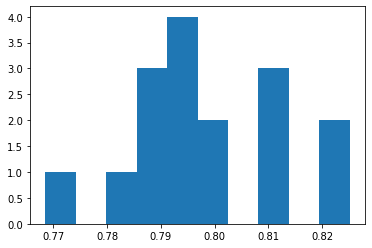

In [34]:
kf = RepeatedKFold(n_splits=2, n_repeats=8 , random_state=42)
for train_lines, test_lines in kf.split(X):
    x_train = X.iloc[train_lines]
    x_test = X.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LogisticRegression(random_state=0, multi_class='multinomial')
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))
hist(resultados_acc)
resultados_acc=[]

Acc:  0.7937219730941704
Acc:  0.7955056179775281
Acc:  0.7825112107623319
Acc:  0.8044943820224719
Acc:  0.7825112107623319
Acc:  0.8067415730337079
Acc:  0.7847533632286996
Acc:  0.8202247191011236
Acc:  0.8251121076233184
Acc:  0.7662921348314606
Acc:  0.8071748878923767
Acc:  0.797752808988764
Acc:  0.7959641255605381
Acc:  0.7955056179775281
Acc:  0.7847533632286996
Acc:  0.7910112359550562

Acc média:  0.7958768957525066


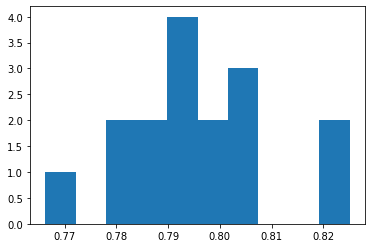

In [35]:
kf = RepeatedKFold(n_splits=2, n_repeats=8 , random_state=42)
for train_lines, test_lines in kf.split(X):
    x_train = X.iloc[train_lines]
    x_test = X.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LogisticRegression(random_state=0, n_jobs=-1, solver='newton-cg')
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))
hist(resultados_acc)
resultados_acc=[]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7959641255605381
Acc:  0.797752808988764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7825112107623319
Acc:  0.8044943820224719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7825112107623319
Acc:  0.8044943820224719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7847533632286996
Acc:  0.8202247191011236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.8318385650224215
Acc:  0.7662921348314606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.8094170403587444
Acc:  0.802247191011236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7959641255605381
Acc:  0.797752808988764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7869955156950673
Acc:  0.7932584269662921

Acc média:  0.7972795006802036


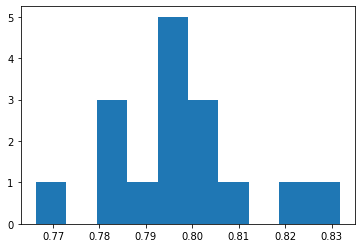

In [36]:
kf = RepeatedKFold(n_splits=2, n_repeats=8 , random_state=42)
for train_lines, test_lines in kf.split(X):
    x_train = X.iloc[train_lines]
    x_test = X.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LogisticRegression(random_state=0, n_jobs=-1, solver='sag')
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))
hist(resultados_acc)
resultados_acc=[]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s

Acc:  0.7982062780269058
Acc:  0.8044943820224719
Acc:  0.7825112107623319
Acc:  0.8089887640449438
Acc:  0.7914798206278026
Acc:  0.8089887640449438
Acc:  0.7802690582959642
Acc:  0.8134831460674158
Acc:  0.8340807174887892
Acc:  0.7707865168539326
Acc:  0.8071748878923767
Acc: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\ProgramData\Anaconda3\lib\site-packages\s

 0.8067415730337079
Acc:  0.7914798206278026
Acc:  0.802247191011236
Acc:  0.7982062780269058
Acc:  0.7932584269662921

Acc média:  0.7995248022371139


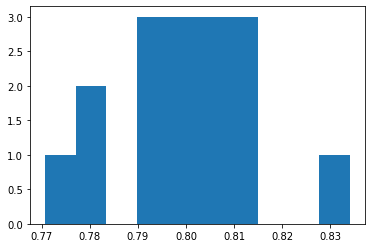

In [37]:
kf = RepeatedKFold(n_splits=2, n_repeats=8 , random_state=42)
for train_lines, test_lines in kf.split(X):
    x_train = X.iloc[train_lines]
    x_test = X.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LogisticRegression(random_state=0, n_jobs=-1, penalty='l1', solver='liblinear')
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))
hist(resultados_acc)
resultados_acc=[]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7959641255605381
Acc:  0.802247191011236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7780269058295964
Acc:  0.8044943820224719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7825112107623319
Acc:  0.8044943820224719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7825112107623319
Acc:  0.8202247191011236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.8340807174887892
Acc:  0.7685393258426966


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.8094170403587444
Acc:  0.802247191011236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7959641255605381
Acc:  0.797752808988764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Acc:  0.7869955156950673
Acc:  0.7932584269662921

Acc média:  0.7974205799365144


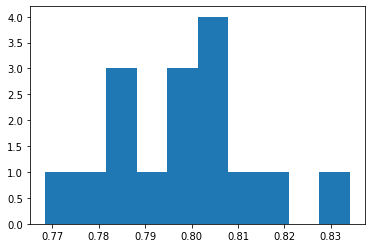

In [38]:
kf = RepeatedKFold(n_splits=2, n_repeats=8 , random_state=42)
for train_lines, test_lines in kf.split(X):
    x_train = X.iloc[train_lines]
    x_test = X.iloc[test_lines]
    y_train = y.iloc[train_lines]
    y_test = y.iloc[test_lines]
    modelo = LogisticRegression(random_state=0, n_jobs=-1, penalty='elasticnet', solver='saga', l1_ratio=0.001)
    modelo.fit(x_train, y_train)
    predict_test = modelo.predict(x_test)
    acc = np.mean(predict_test == y_test)
    resultados_acc.append(acc)
    print('Acc: ',acc)
print('\nAcc média: ',np.mean(resultados_acc))
hist(resultados_acc)
resultados_acc=[]

In [43]:
modelo_final = LogisticRegression(random_state=0, n_jobs=-1, penalty='elasticnet', solver='saga', l1_ratio=0.001)
modelo_final.fit(X,y)
y_predict = modelo_final.predict(X_predict)
resultados = pd.Series(y_predict, index=test['PassengerId'], name='Survived')
resultados.to_csv('Resultados_LRenet.csv', header=True )
pd.read_csv('Resultados_LR2.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
